In [1195]:
# Load libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

### Read Data

In [1196]:
data = pd.read_csv("train.csv")

print('Dataframe Shape: ', data.shape); print('-'*80, '\n');
print("Dataframe Info: \n"); data.info(verbose=True); print('-'*80, '\n')
data.head(5)

Dataframe Shape:  (69999, 172)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float6

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [1197]:
total_rech=data.total_rech_amt_6+data.total_rech_amt_7

In [1198]:
total_rech.quantile(0.7)

740.0

In [1199]:
total_rech.describe()

count    69999.000000
mean       650.516150
std        752.345306
min          0.000000
25%        230.000000
50%        458.000000
75%        839.500000
max      75525.000000
dtype: float64

In [1200]:
#data=data[data.total_rech_amt_6+data.total_rech_amt_7>740]
#data.shape

### Data Analysis

### Identify columns that have no variance

In [1201]:
data_unique_count = data.nunique().sort_values(ascending=False)

# Find columns with all NULL entries
data_unique_count_is_zero = data_unique_count[data_unique_count == 0]
print(data_unique_count_is_zero.count())

0


In [1202]:
# Find columns with all same entries
data_unique_count_is_one = data_unique_count[data_unique_count == 1]
print(data_unique_count_is_one.count())

13


In [1203]:
data_unique_count_is_one

std_ic_t2o_mou_8        1
std_ic_t2o_mou_7        1
circle_id               1
std_og_t2c_mou_8        1
std_og_t2c_mou_7        1
std_og_t2c_mou_6        1
last_date_of_month_8    1
last_date_of_month_7    1
last_date_of_month_6    1
loc_ic_t2o_mou          1
std_og_t2o_mou          1
loc_og_t2o_mou          1
std_ic_t2o_mou_6        1
dtype: int64

In [1204]:
### Drop columns with single value in all rows

drop_no_varience_columns = list(data_unique_count_is_one.index)
data.drop(drop_no_varience_columns, axis=1, inplace=True)

In [1205]:
data.shape

(69999, 159)

### Check for Missing values

In [1206]:
# Check how many rows have all missing values
print("Rows with all NULL values =",  data.isnull().all(axis=1).sum())

Rows with all NULL values = 0


In [1207]:
def getMissingValues(missingCutoff):
    # Function to retun the columns with more than missingCutoff% missing values.
    missing = round(100*(data.isnull().sum()/data.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [1208]:
def imputeNan(data, imputeColList=False, missingColList=False):
    # Function impute the nan with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [1209]:
# Missing values per column expressed as % of total number of values
high_missing_cols=getMissingValues(50)

There are 30 features having more than 50% missing values/entries


In [1210]:
high_missing_cols.index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [1211]:
data.drop(high_missing_cols.index,axis=1,inplace=True)

In [1212]:
data.shape

(69999, 129)

In [1213]:
import seaborn as sns


<AxesSubplot: xlabel='total_rech_amt_8', ylabel='Density'>

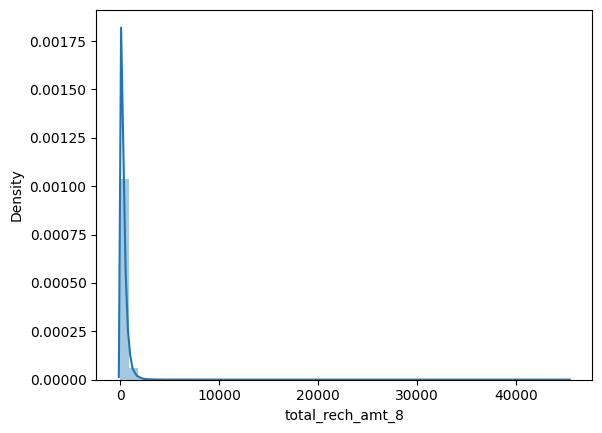

In [1214]:
sns.distplot(data.total_rech_amt_8)

In [1215]:
getMissingValues(50)

There are 0 features having more than 50% missing values/entries


Series([], dtype: float64)

In [1216]:
getMissingValues(0)

There are 84 features having more than 0% missing values/entries


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_mou_6           4.0
s

In [1217]:
data.shape

(69999, 129)

In [1218]:
date_vars = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]

data.drop(date_vars, axis=1, inplace=True)

In [1219]:
data.columns[data.nunique()==2]

Index(['churn_probability'], dtype='object')

In [1220]:
data.shape

(69999, 126)

In [1221]:
data.drop("id", axis=1, inplace=True)

In [1222]:
data.shape

(69999, 125)

## Modelling Start

In [1223]:
X = data[data.columns[~data.columns.isin(['churn_probability'])]]
Y = data['churn_probability']
numeric_cols=X.columns[X.nunique()!=2]

In [1225]:
orig_cols=X.columns
from sklearn.impute import SimpleImputer
simple_imtr = SimpleImputer(strategy='median')
X = pd.DataFrame(simple_imtr.fit_transform(X))
X.columns=orig_cols

In [1226]:
orig_columns=X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std= pd.DataFrame(X_std)
X_std.columns=orig_columns
X_std.shape

(69999, 124)

In [1227]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.7,test_size=0.3,random_state=42)

In [1228]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=124)

In [1229]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (48999, 124)
Training dataset target size (48999,)
Test dataset size (21000, 124)
Test dataset target size (21000,)


In [1230]:
print("Data imbalance, counts of label '1': {}".format(sum(y_train==1)))
print("Data imbalance, counts of label '0': {} \n".format(sum(y_train==0)))

Data imbalance, counts of label '1': 4977
Data imbalance, counts of label '0': 44022 



### Using SMOTE to correct data imbalance
## class weights giving better results - using class weights

In [1231]:
sm = SMOTE(random_state=42)
#X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
X_train_smote = X_train
y_train_smote = y_train

count_class_1 = y_train.value_counts()[0]
count_class_2 = y_train.value_counts()[1]
ratio = count_class_1/count_class_2

print('After update, the shape of train_X: {}'.format(X_train_smote.shape))
print('After update, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After update, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After update, counts of label '0': {}".format(sum(y_train_smote==0)))

After update, the shape of train_X: (48999, 124)
After update, the shape of train_y: (48999,) 

After update, counts of label '1': 4977
After update, counts of label '0': 44022


## PCA Start

In [866]:
# PCA object with default parameter
pca = PCA(random_state=42)

In [867]:
#Doing PCA on the train data
pca.fit(X_train_smote)

PCA(random_state=42)

In [868]:
print(pca.components_)
print('-'*80, '\n');
print(pca.explained_variance_ratio_)
print('-'*80, '\n');
print(pca.explained_variance_ratio_.cumsum())

[[ 1.44771578e-03  1.44571015e-01  1.49149073e-01 ...  1.13772307e-01
   1.12412853e-01  1.08354515e-01]
 [ 1.42710965e-04 -9.30102702e-02 -9.78322846e-02 ...  8.70320106e-02
   8.88431392e-02  8.69537259e-02]
 [ 2.55812437e-03 -4.93415963e-02 -6.41912626e-02 ...  4.70160439e-03
   4.64746766e-03  5.41389978e-03]
 ...
 [ 0.00000000e+00  4.01921002e-16 -1.37904416e-16 ... -1.70971949e-17
  -1.13946570e-17  4.67717124e-17]
 [-0.00000000e+00 -3.89777098e-17  4.18523502e-16 ... -4.41011309e-17
  -2.87815571e-17  2.80766958e-17]
 [-0.00000000e+00 -5.93602117e-17 -3.09803273e-16 ... -1.67328727e-17
   1.92171852e-17  1.40363741e-17]]
-------------------------------------------------------------------------------- 

[1.24279355e-01 9.30322800e-02 6.28469878e-02 4.98141732e-02
 3.70300746e-02 2.97466624e-02 2.69318944e-02 2.43780223e-02
 2.19101577e-02 2.11174014e-02 2.06103607e-02 2.02011189e-02
 1.95996440e-02 1.70797774e-02 1.65812281e-02 1.59771571e-02
 1.47957932e-02 1.45684808e-02 1.4208

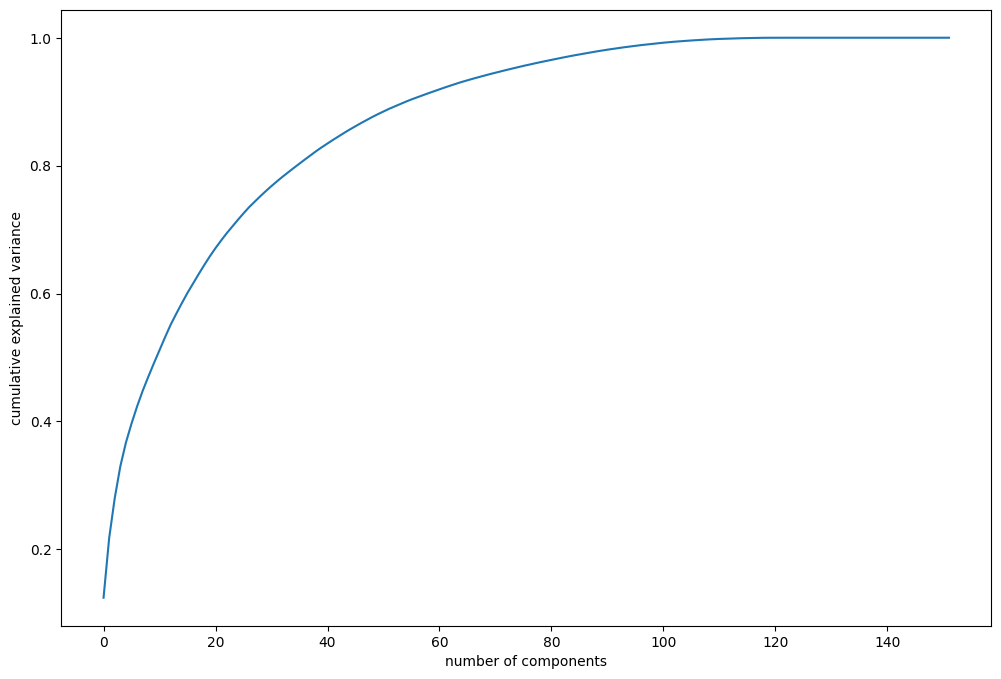

In [869]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [870]:
#pick the number of components explaining max variance
pca_X= PCA(n_components=60)

df_train_pca_X = pca_X.fit_transform(X_train_smote)
print(df_train_pca_X.shape)
df_test_pca_X = pca_X.transform(X_test)
print(df_test_pca_X.shape)

(48999, 60)
(21000, 60)


## Logistic Regression with PCA data

In [871]:
#Run the model using the selected variables
LR = LogisticRegression(class_weight='balanced')
LR.fit(df_train_pca_X, y_train_smote)

LogisticRegression(class_weight='balanced')

In [872]:
#Predicted probabilities
y_pred_train = LR.predict(df_train_pca_X)

#Printing results
print("Train data results")
print('-'*80, '\n');
print("Accuracy Score:",accuracy_score(y_train_smote,y_pred_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train_smote, y_pred_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train_smote,y_pred_train))
print('-'*80, '\n');
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_train_smote, y_pred_train)))

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.7837302802098002
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     44022
           1       0.30      0.85      0.44      4977

    accuracy                           0.78     48999
   macro avg       0.64      0.81      0.65     48999
weighted avg       0.91      0.78      0.82     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[34194  9828]
 [  769  4208]]
-------------------------------------------------------------------------------- 

roc_auc_score: 0.81


In [873]:
#Predicted probabilities
y_pred_test = LR.predict(df_test_pca_X)

#Printing results
print("Test data results");
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_test,y_pred_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_test))
print('-'*80, '\n');
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_test, y_pred_test)))

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.7844761904761904
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     18845
           1       0.31      0.86      0.45      2155

    accuracy                           0.78     21000
   macro avg       0.64      0.82      0.66     21000
weighted avg       0.91      0.78      0.82     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[14610  4235]
 [  291  1864]]
-------------------------------------------------------------------------------- 

roc_auc_score: 0.82


## Trying Random Forest without PCA Data

In [1357]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier( random_state=42,n_jobs=-1,
                             class_weight='balanced_subsample',
                             max_depth=25,
                             min_samples_leaf=5,
                             min_samples_split=20,
                            )

#fit
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=25,
                       min_samples_leaf=5, min_samples_split=20, n_jobs=-1,
                       random_state=42)

In [1358]:
predictions_train = rfc.predict(X_train_smote)
print ("Train data results")
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_train_smote, predictions_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train_smote, predictions_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train_smote, predictions_train))

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9692034531316965
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     44022
           1       0.79      0.95      0.86      4977

    accuracy                           0.97     48999
   macro avg       0.89      0.96      0.92     48999
weighted avg       0.97      0.97      0.97     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[42779  1243]
 [  266  4711]]


In [1359]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = rfc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_test))

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9367619047619048
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     18845
           1       0.69      0.71      0.70      2155

    accuracy                           0.94     21000
   macro avg       0.83      0.84      0.83     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[18148   697]
 [  631  1524]]


In [902]:
importances = rfc.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns=['colName','value'])
RF_feature_importance.head(15)

,colName,value
0,0.109493,loc_ic_mou_8
1,0.068447,total_ic_mou_8
2,0.066395,loc_ic_t2m_mou_8
3,0.054789,loc_ic_t2t_mou_8
4,0.051492,loc_og_mou_8
5,0.048427,total_og_mou_8
6,0.039900,offnet_mou_8
7,0.039590,loc_og_t2m_mou_8
8,0.038743,last_day_rch_amt_8
9,0.036352,roam_og_mou_8


In [503]:
# # model with the best hyperparameters
# using class weights to handle imbalance

rfc = RandomForestClassifier(bootstrap=True,                                  
                             random_state=42,n_jobs=-1,max_depth=10)

#fit
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [504]:
predictions_train = rfc.predict(X_train_smote)
print ("Train data results")
print('-'*80, '\n');
print("accuracy score:", accuracy_score(y_train_smote, predictions_train))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_train_smote, predictions_train))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_train_smote, predictions_train))

Train data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9494683564970714
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     44022
           1       0.82      0.64      0.72      4977

    accuracy                           0.95     48999
   macro avg       0.89      0.81      0.85     48999
weighted avg       0.95      0.95      0.95     48999

-------------------------------------------------------------------------------- 

confusion matrix:
[[43316   706]
 [ 1770  3207]]


In [505]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = rfc.predict(X_test)
print("accuracy score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_test, predictions_test))

Test data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9421904761904762
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.78      0.60      0.68      2155

    accuracy                           0.94     21000
   macro avg       0.87      0.79      0.83     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

confusion matrix:
[[18484   361]
 [  853  1302]]


In [116]:
X_test.shape

(21000, 152)

In [105]:
importances = rfc_updated.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns=['colName','value'])
RF_feature_importance.head(15)

,colName,value
0,0.128346,loc_ic_mou_8
1,0.122525,total_ic_mou_8
2,0.081806,loc_ic_t2m_mou_8
3,0.062586,total_og_mou_8
4,0.056361,loc_og_mou_8
5,0.044765,offnet_mou_8
6,0.042471,loc_ic_t2t_mou_8
7,0.037831,arpu_8
8,0.032213,loc_og_t2m_mou_8
9,0.030743,loc_og_t2t_mou_8


In [141]:
from sklearn.model_selection import GridSearchCV

In [844]:
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [25,50,75],
    'min_samples_split': [25,50,75]
}
rf = RandomForestClassifier(random_state=42, n_jobs=-1,verbose=1,class_weight='balanced')
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=3, scoring="accuracy")

In [845]:

grid_search.fit(X_train_smote, y_train_smote)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.3s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'min_samples_leaf': [25, 50, 75],
                         'min_samples_split': [25, 50, 75]},
             scoring='accuracy', verbose=3)

In [846]:
grid_search.best_estimator_


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=25, min_samples_split=25, n_jobs=-1,
                       random_state=42, verbose=1)

## Trying with XG Boost

In [1459]:
from xgboost import XGBClassifier

#Running the random forest with default parameters.
xgb = XGBClassifier(random_state=42,max_depth=7)

#fit
xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [1460]:
predictions_train = xgb.predict(X_train_smote)
print ("Train data results")
print('-'*80, '\n');
print("accuracy score:", accuracy_score(y_train_smote, predictions_train))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_train_smote, predictions_train))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_train_smote, predictions_train))

Train data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9898365272760669
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     44022
           1       0.96      0.94      0.95      4977

    accuracy                           0.99     48999
   macro avg       0.98      0.97      0.97     48999
weighted avg       0.99      0.99      0.99     48999

-------------------------------------------------------------------------------- 

confusion matrix:
[[43813   209]
 [  289  4688]]


In [1461]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = xgb.predict(X_test)
print("accuracy score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_test, predictions_test))

Test data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9416666666666667
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.76      0.63      0.69      2155

    accuracy                           0.94     21000
   macro avg       0.86      0.80      0.83     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

confusion matrix:
[[18424   421]
 [  804  1351]]


In [1465]:
importances = xgb.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns=['colName','value'])
RF_feature_importance.head(15)

,colName,value
0,0.230815,total_ic_mou_8
1,0.025605,roam_og_mou_8
2,0.020023,loc_ic_mou_8
3,0.019758,spl_ic_mou_8
4,0.018140,last_day_rch_amt_8
5,0.017380,vol_3g_mb_8
6,0.017279,vol_2g_mb_8
7,0.015959,arpu_8
8,0.010158,total_rech_amt_8
9,0.009670,std_og_mou_7


### Evaluating Test Data

In [1250]:
X_test.shape

(21000, 124)

In [1386]:
test_data = pd.read_csv("test.csv")

print('Dataframe Shape: ', test_data.shape); print('-'*80, '\n');
test_data.head(5)

Dataframe Shape:  (30000, 171)
-------------------------------------------------------------------------------- 



,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [1387]:
drop_no_varience_columns = list(data_unique_count_is_one.index)
test_data.drop(drop_no_varience_columns, axis=1, inplace=True)

test_data.shape

(30000, 158)

In [1388]:

test_data.drop(high_missing_cols.index, axis=1, inplace=True)
test_data.shape

(30000, 128)

In [1389]:
test_data.drop(date_vars, axis=1, inplace=True)
test_data.shape

(30000, 125)

In [1390]:
id=test_data.id

In [1391]:
test_data.drop("id", axis=1, inplace=True)
test_data.shape

(30000, 124)

In [1392]:
missing_values = pd.DataFrame((test_data.isnull().sum()/len(test_data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values.head(10)

,feature,Missing%
62,loc_ic_t2f_mou_8,5.583333
50,og_others_8,5.583333
35,std_og_t2m_mou_8,5.583333
32,std_og_t2t_mou_8,5.583333
41,std_og_mou_8,5.583333
29,loc_og_mou_8,5.583333
44,isd_og_mou_8,5.583333
77,std_ic_mou_8,5.583333
26,loc_og_t2c_mou_8,5.583333
71,std_ic_t2m_mou_8,5.583333


In [1393]:
test_data.shape

(30000, 124)

In [1394]:
test_data.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00
1,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00
2,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,500,1000,1000,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84
3,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0,45.36,207.18,24.01,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,546.06,504.86,531.64,0.00,4.26,0.00,9.63,11.88,8.83,0.0,0.0,0.00,9.63,16.14,8.83,555.69,522.44,549.13,0.00,0.00,0.00,0.0

In [1395]:
orig_cols=test_data.columns
test_data = pd.DataFrame(simple_imtr.fit_transform(test_data))
test_data.columns=orig_cols

In [1396]:
test_data = scaler.transform(test_data)

In [1462]:
predictions_test = xgb.predict(test_data)
count_arr = np.bincount(predictions_test)

In [1463]:
predictions_test

array([0, 0, 1, ..., 0, 0, 0])

In [1464]:
count_arr = np.bincount(predictions_test)
# Count occurrence of element '1' in numpy array
print('Total occurences of "1" in array: ', count_arr[1])
# Count occurrence of element '0' in numpy array
print('Total occurences of "0" in array: ', count_arr[0])

Total occurences of "1" in array:  2535
Total occurences of "0" in array:  27465


In [1436]:
predictions_test.shape

(30000,)

In [1437]:
test_data.shape

(30000, 124)

In [1438]:
solution_df=pd.DataFrame({'id':id,'churn_probability':predictions_test})

In [1439]:
solution_df.head(10)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
5,70004,1
6,70005,0
7,70006,0
8,70007,0
9,70008,1


In [1440]:
solution_df.to_csv('solution.csv', index=False)